In [1525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1526]:
headers = ['ProgramAdministrator',	'ProgramName',	'FuelType',	'Sector',	'NetFuelSavingAcquired',	'FuelSavingsUnit',	'CumulativeNetEnergySavingsAcquiredAsOfDate']
df = pd.read_csv('NYEnergySaving.csv', names= headers, skiprows=1)
df = df.dropna()
df.head()

,ProgramAdministrator,ProgramName,FuelType,Sector,NetFuelSavingAcquired,FuelSavingsUnit,CumulativeNetEnergySavingsAcquiredAsOfDate
0,Central Hudson Gas & Electric Corporation,Expanded Residential HVAC Program,Electric,Residential,0.00,MWh,2019-12-31T00:00:00.000
1,Central Hudson Gas & Electric Corporation,Home Energy Reporting,Electric,Residential,74836.28,MWh,2019-12-31T00:00:00.000
2,Central Hudson Gas & Electric Corporation,Home Energy Reporting,Gas,Residential,97050.76,Dth,2019-12-31T00:00:00.000
3,Central Hudson Gas & Electric Corporation,Mid-Size Commercial Business Program,Electric,Commercial,35711.02,MWh,2019-12-31T00:00:00.000
4,Central Hudson Gas & Electric Corporation,Residential Appliance Recycling Program,Electric,Residential,19562.37,MWh,2019-12-31T00:00:00.000


In [1527]:

for i,row in df.iterrows():
    if 'Dth' in row['FuelSavingsUnit']:
        df.at[i, 'NetFuelSavingAcquired'] = df.at[i, 'NetFuelSavingAcquired'] * 0.29307
    df['FuelSavingsUnit'] = df['FuelSavingsUnit'].str.replace('Dth', 'MWh')
    df['ProgramName'] = df['ProgramName'].str.strip()
    df['ProgramName'] = df['ProgramName'].str.replace('*', '')
    df['FuelType'] = df['FuelType'].str.replace('Elecric', 'Electric')
    if 'EmPower New York' in row['ProgramName']:
        df.at[i, 'ProgramName'] = 'EmPower New York Program'
    elif 'NY Energy Star Homes' in row['ProgramName']:
        df.at[i, 'ProgramName'] = 'New York Energy Star Homes'
    elif 'Residential High Efficiency Heating, Water Heating & Controls' in row['ProgramName']:
        df.at[i, 'ProgramName'] = 'Residential High Efficiency Heating, Water Heating & Controls Program'

df.head()

,ProgramAdministrator,ProgramName,FuelType,Sector,NetFuelSavingAcquired,FuelSavingsUnit,CumulativeNetEnergySavingsAcquiredAsOfDate
0,Central Hudson Gas & Electric Corporation,Expanded Residential HVAC Program,Electric,Residential,0.000000,MWh,2019-12-31T00:00:00.000
1,Central Hudson Gas & Electric Corporation,Home Energy Reporting,Electric,Residential,74836.280000,MWh,2019-12-31T00:00:00.000
2,Central Hudson Gas & Electric Corporation,Home Energy Reporting,Gas,Residential,28442.666233,MWh,2019-12-31T00:00:00.000
3,Central Hudson Gas & Electric Corporation,Mid-Size Commercial Business Program,Electric,Commercial,35711.020000,MWh,2019-12-31T00:00:00.000
4,Central Hudson Gas & Electric Corporation,Residential Appliance Recycling Program,Electric,Residential,19562.370000,MWh,2019-12-31T00:00:00.000


In [1528]:
df_commercial = df.loc[df['Sector'] == 'Commercial']
df_residential = df.loc[df['Sector'] == 'Residential']
df_multi_family = df.loc[df['Sector'] == 'Multi-Family']

In [1529]:
type(df_commercial)

pandas.core.frame.DataFrame

In [1530]:
def plotter(df, x, title):
      if x == 'Program':
            df_copy = df[['ProgramName', 'NetFuelSavingAcquired']]            
            df_copy = df.groupby('ProgramName')['NetFuelSavingAcquired'].median()
            df_copy.plot(kind='bar', xlabel='ProgramName', ylabel='NetFuelSavingAcquired, MWh', x='ProgramName', y='NetFuelSavingAcquired', title=title)
      elif x == 'Fuel':
            df_copy = df[['FuelType', 'NetFuelSavingAcquired']]
            df_copy = df.groupby('FuelType')['NetFuelSavingAcquired'].median()
            df_copy.plot(kind='bar', xlabel='FuelType', ylabel='NetFuelSavingAcquired, MWh', x='FuelType', y='NetFuelSavingAcquired', title=title)
      elif x == 'ProgramAdministrator':
            df_copy = df[['ProgramAdministrator', 'NetFuelSavingAcquired']]
            df_copy = df.groupby('ProgramAdministrator')['NetFuelSavingAcquired'].median()
            df_copy.plot(kind='bar', xlabel='ProgramAdministrator', ylabel='NetFuelSavingAcquired, MWh', x='ProgramAdministrator', y='NetFuelSavingAcquired', title=title)
      else:
            print('Invalid input')

In [1531]:
def groupper(df, x):
    if x == 'Program':
        df_copy = df[['ProgramName', 'NetFuelSavingAcquired']]            
        df_copy = df.groupby('ProgramName')['NetFuelSavingAcquired'].median()
        df_copy = df_copy.sort_values(ascending=False)[:5]
        df_copy = df_copy.keys().tolist()
    elif x == 'Fuel':
        df_copy = df[['FuelType', 'NetFuelSavingAcquired']]
        df_copy = df.groupby('FuelType')['NetFuelSavingAcquired'].median()
        df_copy = df_copy.sort_values(ascending=False)[:5]
        df_copy = df_copy.keys().tolist()
    elif x == 'ProgramAdministrator':
        df_copy = df[['ProgramAdministrator', 'NetFuelSavingAcquired']]
        df_copy = df.groupby('ProgramAdministrator')['NetFuelSavingAcquired'].median()
        df_copy = df_copy.sort_values(ascending=False)[:5]
        df_copy = df_copy.keys().tolist()
    else:
        print('Invalid input')
    return df_copy

Analysys of the raw data

In [1532]:
com_pr = groupper(df_commercial, 'Program')
print(com_pr)

['Industrial & Process Efficiency Program', 'Energy Initiative - Commercial & Industrial Electric Program', 'New Construction Program', 'Commercial & Industrial Gas Energy Efficiency Program', 'C&I Gas Efficient Equipment Rebate Program']


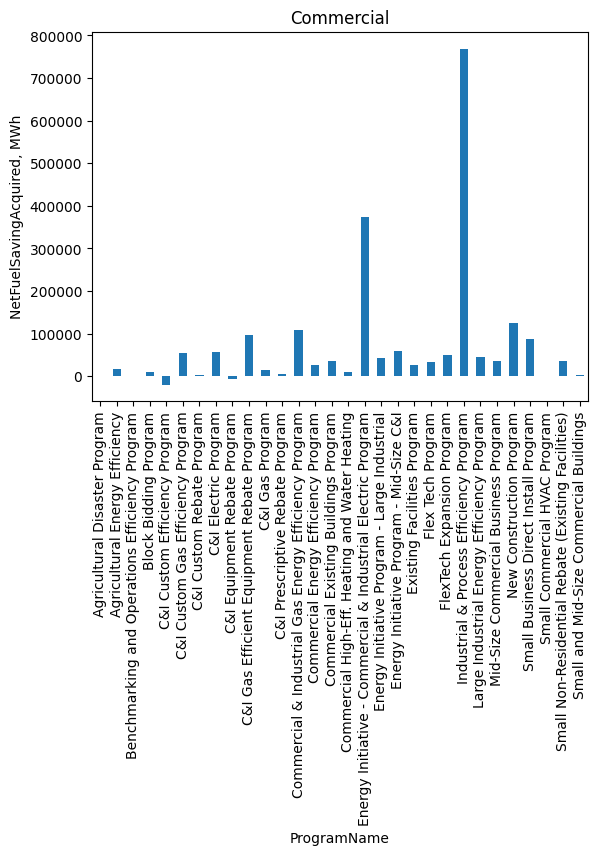

In [1533]:

plotter(df_commercial, 'Program', 'Commercial')

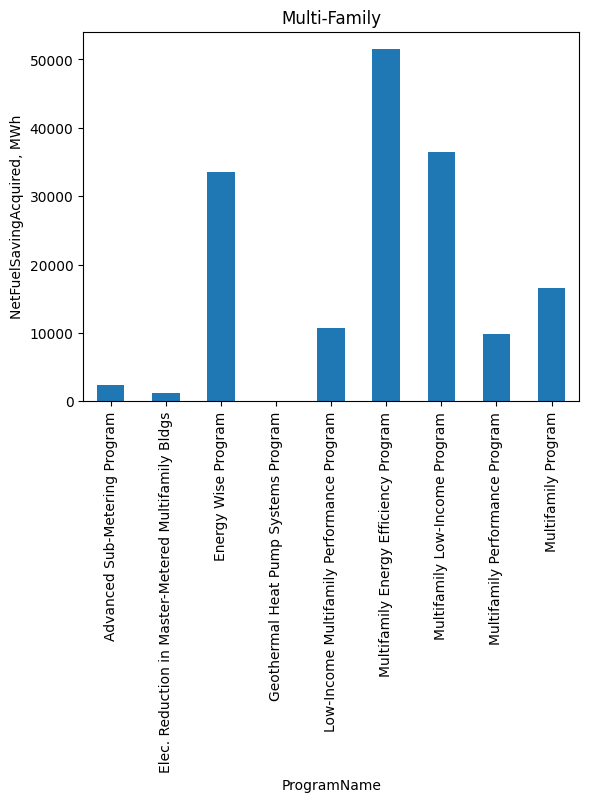

In [1534]:
mult_pr = groupper(df_multi_family, 'Program')
plotter(df_multi_family, 'Program', 'Multi-Family')

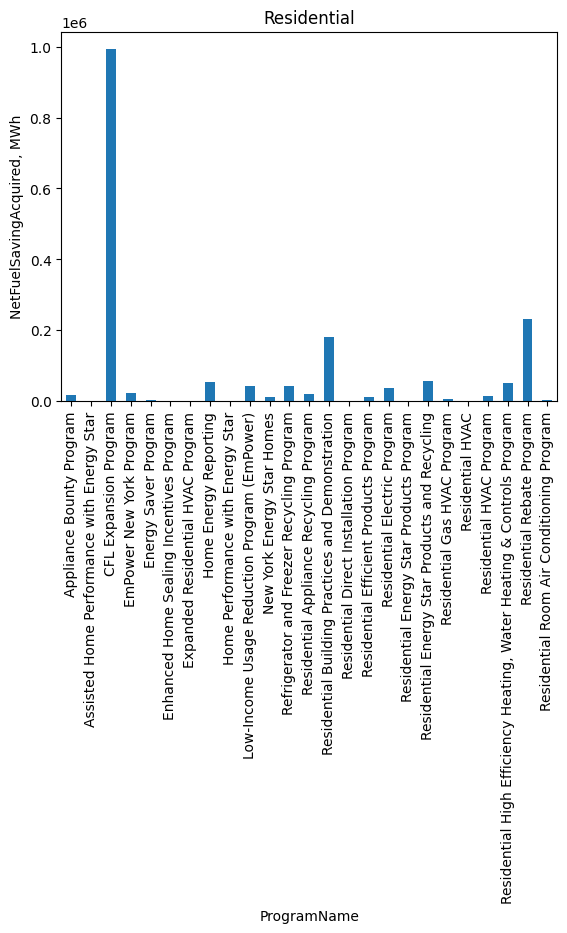

In [1535]:
res_pr = groupper(df_residential, 'Program')
plotter(df_residential, 'Program','Residential')


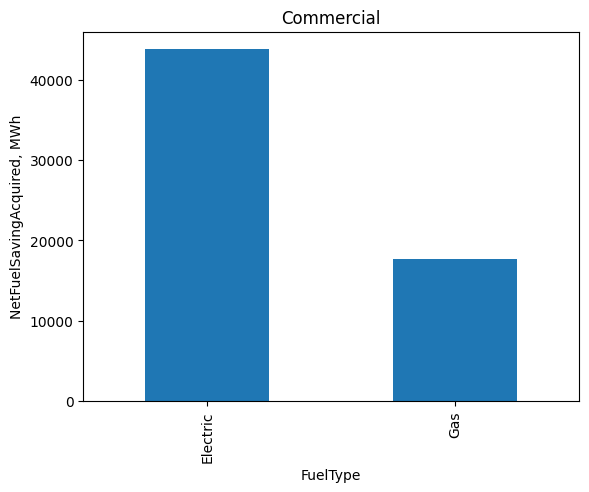

In [1536]:
plotter(df_commercial, 'Fuel', 'Commercial')

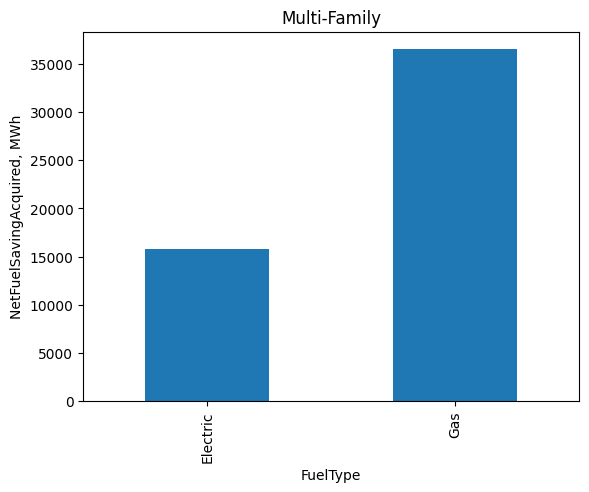

In [1537]:
plotter(df_multi_family, 'Fuel', 'Multi-Family')

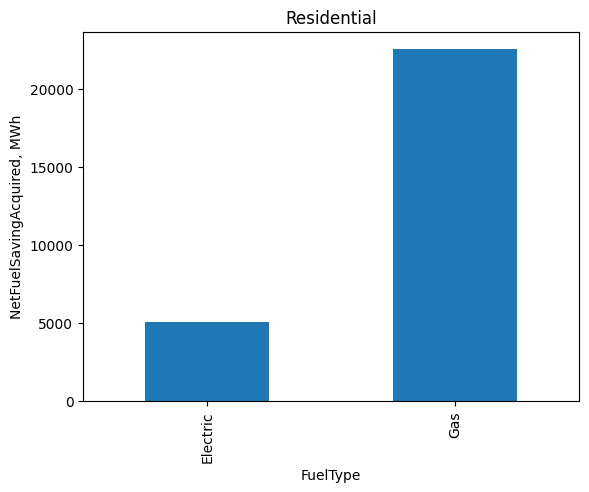

In [1538]:
plotter(df_residential, 'Fuel', 'Residential')

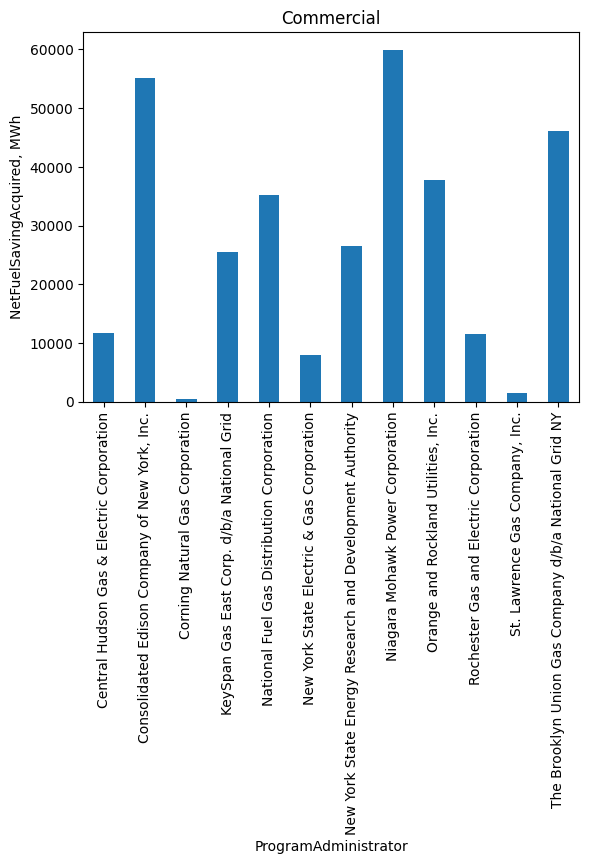

In [1539]:
com_admin = groupper(df_commercial, 'ProgramAdministrator')
plotter(df_commercial, 'ProgramAdministrator', 'Commercial')

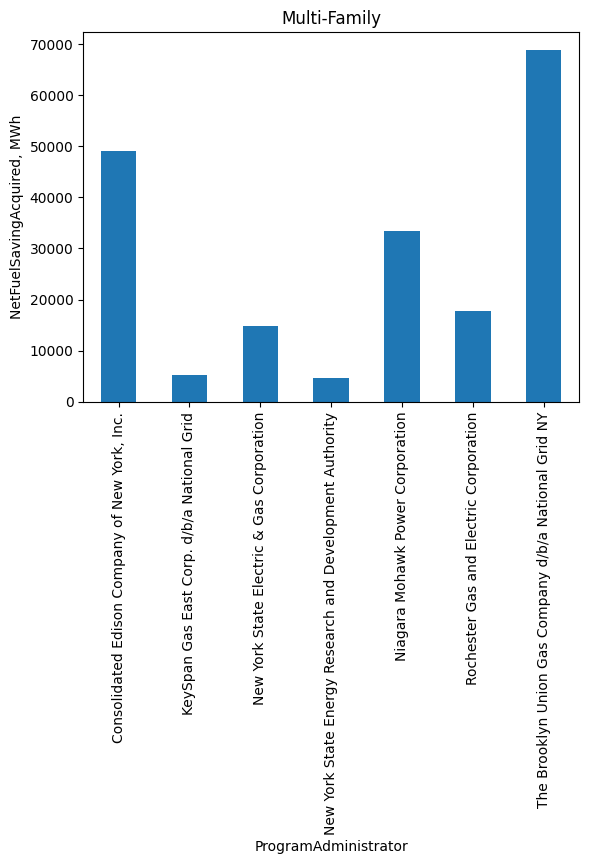

In [1540]:
mult_admin = groupper(df_multi_family, 'ProgramAdministrator')
plotter(df_multi_family, 'ProgramAdministrator', 'Multi-Family')

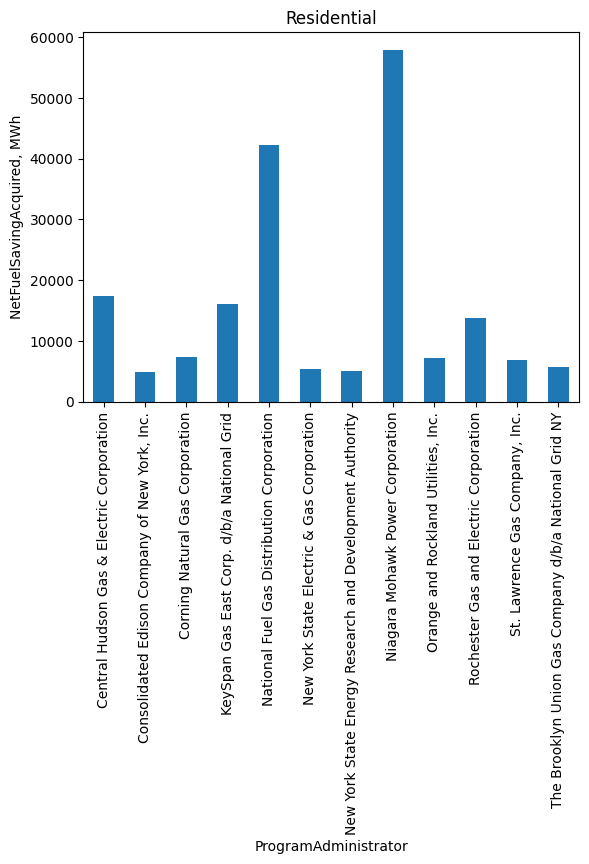

In [1541]:
res_admin = groupper(df_residential, 'ProgramAdministrator')
plotter(df_residential, 'ProgramAdministrator', 'Residential')

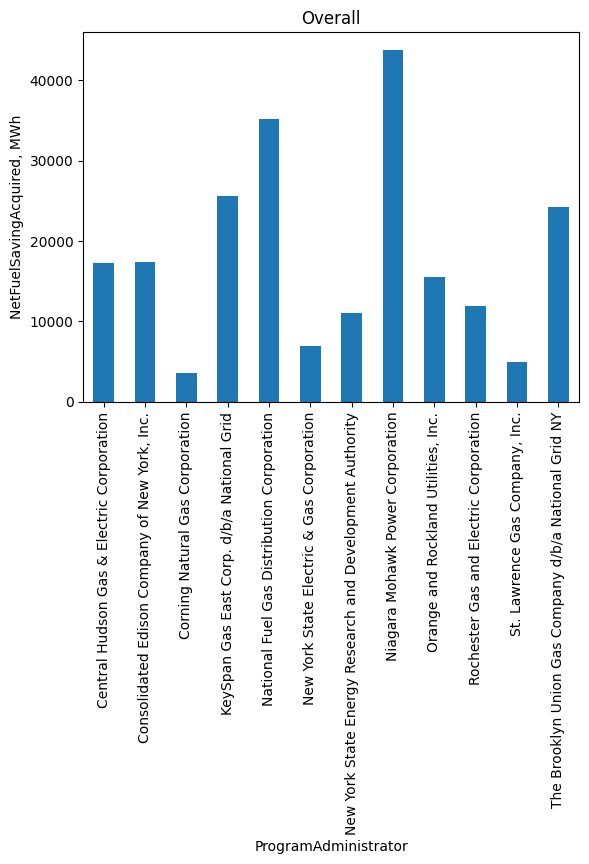

In [1542]:
plotter(df, 'ProgramAdministrator', 'Overall')

In [1543]:
df_negatives = df[df.NetFuelSavingAcquired <= 0]
df_negatives.head(20)


,ProgramAdministrator,ProgramName,FuelType,Sector,NetFuelSavingAcquired,FuelSavingsUnit,CumulativeNetEnergySavingsAcquiredAsOfDate
0,Central Hudson Gas & Electric Corporation,Expanded Residential HVAC Program,Electric,Residential,0.000000,MWh,2019-12-31T00:00:00.000
12,"Consolidated Edison Company of New York, Inc.",C&I Custom Efficiency Program,Gas,Commercial,-28076.598358,MWh,2019-12-31T00:00:00.000
15,"Consolidated Edison Company of New York, Inc.",C&I Equipment Rebate Program,Gas,Commercial,-12064.970948,MWh,2019-12-31T00:00:00.000
18,"Consolidated Edison Company of New York, Inc.",Multifamily Energy Efficiency Program,Gas,Multi-Family,-10982.894963,MWh,2019-12-31T00:00:00.000
29,"Consolidated Edison Company of New York, Inc.",Small Business Direct Install Program,Gas,Commercial,-102.481890,MWh,2019-12-31T00:00:00.000
70,New York State Energy Research and Development...,Benchmarking and Operations Efficiency Program,Electric,Commercial,0.000000,MWh,2019-12-31T00:00:00.000
74,New York State Energy Research and Development...,EmPower New York Program,Gas,Residential,-6673.051504,MWh,2019-12-31T00:00:00.000
80,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-429924.244354,MWh,2019-12-31T00:00:00.000
84,New York State Energy Research and Development...,Geothermal Heat Pump Systems Program,Electric,Multi-Family,0.000000,MWh,2019-12-31T00:00:00.000
92,New York State Energy Research and Development...,Low-Income Multifamily Performance Program,Gas,Multi-Family,-1476.665433,MWh,2019-12-31T00:00:00.000


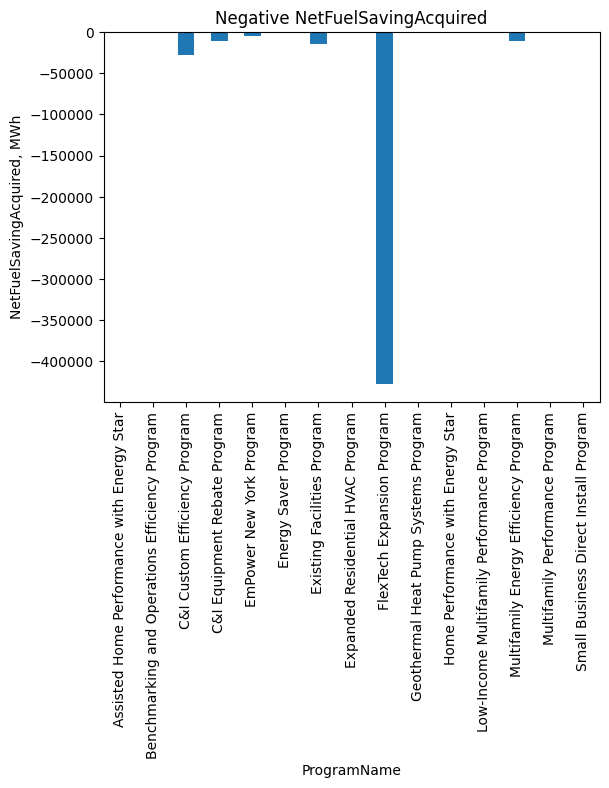

In [1544]:
plotter(df_negatives, 'Program', 'Negative NetFuelSavingAcquired')

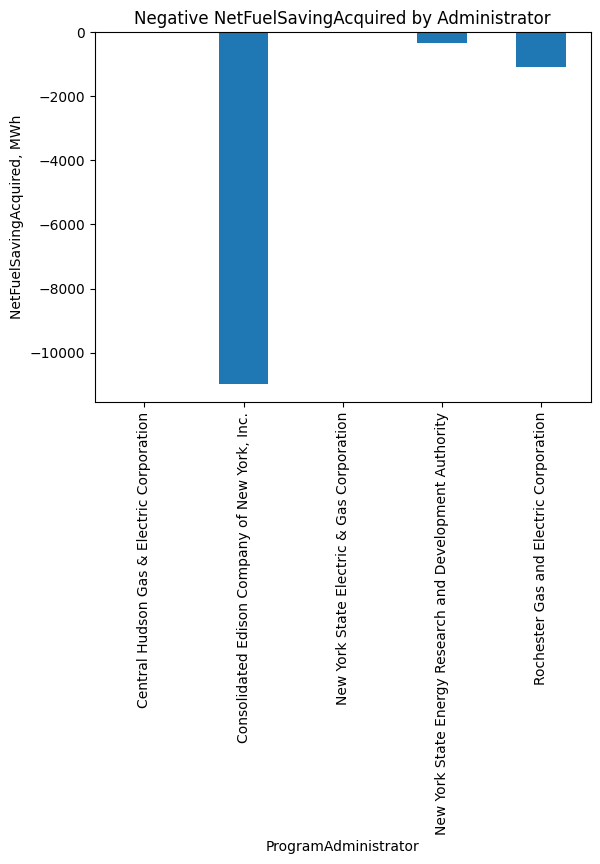

In [1545]:
plotter(df_negatives, 'ProgramAdministrator', 'Negative NetFuelSavingAcquired by Administrator')

In [1546]:
df_possible_errors = df_negatives[df_negatives.NetFuelSavingAcquired < -400000]
df_possible_errors.head(20)

,ProgramAdministrator,ProgramName,FuelType,Sector,NetFuelSavingAcquired,FuelSavingsUnit,CumulativeNetEnergySavingsAcquiredAsOfDate
80,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-4.299242e+05,MWh,2019-12-31T00:00:00.000
234,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-4.275254e+05,MWh,2019-09-30T00:00:00.000
529,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-4.343744e+05,MWh,2017-12-31T00:00:00.000
530,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-4.343743e+05,MWh,2017-12-31T00:00:00.000
531,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-1.482152e+06,MWh,2017-12-31T00:00:00.000
794,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-4.343640e+05,MWh,2017-09-30T00:00:00.000
947,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-4.319454e+05,MWh,2017-06-30T00:00:00.000
1100,New York State Energy Research and Development...,FlexTech Expansion Program,Gas,Commercial,-4.174471e+05,MWh,2015-12-31T00:00:00.000


In [1547]:
df_flex = df[df.ProgramName == 'FlexTech Expansion Program']
df_flex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 80 to 1866
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ProgramAdministrator                        26 non-null     object 
 1   ProgramName                                 26 non-null     object 
 2   FuelType                                    26 non-null     object 
 3   Sector                                      26 non-null     object 
 4   NetFuelSavingAcquired                       26 non-null     float64
 5   FuelSavingsUnit                             26 non-null     object 
 6   CumulativeNetEnergySavingsAcquiredAsOfDate  26 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.6+ KB


In [1548]:
df_unsuccessfull = df_negatives[df_negatives.NetFuelSavingAcquired > -50000]

df_unsuccessfull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 1922
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ProgramAdministrator                        156 non-null    object 
 1   ProgramName                                 156 non-null    object 
 2   FuelType                                    156 non-null    object 
 3   Sector                                      156 non-null    object 
 4   NetFuelSavingAcquired                       156 non-null    float64
 5   FuelSavingsUnit                             156 non-null    object 
 6   CumulativeNetEnergySavingsAcquiredAsOfDate  156 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


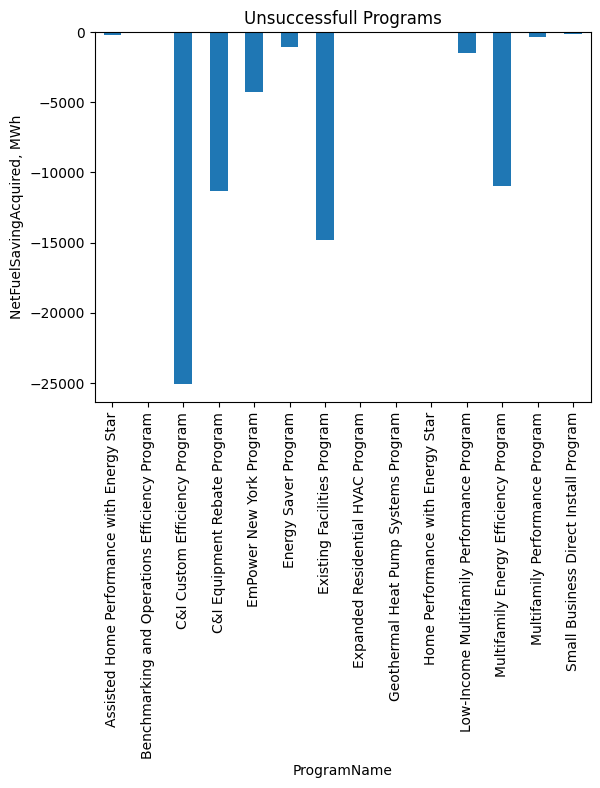

In [1549]:
plotter(df_unsuccessfull, 'Program', 'Unsuccessfull Programs')

Cleaning the data2

In [1550]:
df_clean = df[df.NetFuelSavingAcquired > 0].copy()
df_clean.drop(columns=['CumulativeNetEnergySavingsAcquiredAsOfDate', 'FuelSavingsUnit'], inplace=True)
df_clean.rename(columns={'NetFuelSavingAcquired': 'NetFuelSavingAcquired,MWh'}, inplace=True)
df_clean['Success'] = 0
df_clean.head()


,ProgramAdministrator,ProgramName,FuelType,Sector,"NetFuelSavingAcquired,MWh",Success
1,Central Hudson Gas & Electric Corporation,Home Energy Reporting,Electric,Residential,74836.280000,0
2,Central Hudson Gas & Electric Corporation,Home Energy Reporting,Gas,Residential,28442.666233,0
3,Central Hudson Gas & Electric Corporation,Mid-Size Commercial Business Program,Electric,Commercial,35711.020000,0
4,Central Hudson Gas & Electric Corporation,Residential Appliance Recycling Program,Electric,Residential,19562.370000,0
5,Central Hudson Gas & Electric Corporation,Residential HVAC Program,Electric,Residential,125.683000,0


In [1551]:
programs = df_clean['ProgramName'].unique()
admins = df_clean['ProgramAdministrator'].unique()

In [1552]:
def make_success(index):
    df_clean.at[index, 'Success'] = 1

In [1553]:
for i,row in df_clean.iterrows():
    program = row['ProgramName']
    admin = row['ProgramAdministrator']
    if 'Commercial' in row ['Sector']:        
        if program in com_pr:
            make_success(i)
        if admin in com_admin:
            make_success(i)
    elif 'Multi-Family' in row ['Sector']:
        if program in mult_pr:
            make_success(i)
        if admin in mult_admin:
            make_success(i)
    elif 'Residential' in row ['Sector']:
        if program in res_pr:
            make_success(i)
        if admin in res_admin:
            make_success(i)

In [1554]:
print(df_clean['Success'].value_counts())

df_clean.to_csv('NYEnergyClean.csv')

Success
0    966
1    802
Name: count, dtype: int64


In [1555]:
# Encode "Program Name", "Program Administrator", and "Sector" from NYEnergyClean.csv 
# into numerical, using OneHotEncoder

from sklearn.preprocessing import OneHotEncoder # pip install pandas scikit-learn

df_to_encode = pd.read_csv('NYEnergyClean.csv')
columns_to_encode = ["ProgramName", "ProgramAdministrator", "Sector"]

encoder = OneHotEncoder(sparse_output=False)

for column in columns_to_encode:
    encoded_data = encoder.fit_transform(df_to_encode[[column]])
    encoded_feature_names = encoder.get_feature_names_out([column])
    
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)
    df_to_encode = pd.concat([df_to_encode, encoded_df], axis=1)

df_to_encode.to_csv("NYEnergyCleanEncoded.csv")
df_to_encode.head()

,Unnamed: 0,ProgramAdministrator,ProgramName,FuelType,Sector,"NetFuelSavingAcquired,MWh",Success,ProgramName_Advanced Sub-Metering Program,ProgramName_Agricultural Disaster Program,ProgramName_Agricultural Energy Efficiency,...,ProgramAdministrator_New York State Energy Research and Development Authority,ProgramAdministrator_Niagara Mohawk Power Corporation,"ProgramAdministrator_Orange and Rockland Utilities, Inc.",ProgramAdministrator_Rochester Gas and Electric Corporation,"ProgramAdministrator_St. Lawrence Gas Company, Inc.",ProgramAdministrator_The Brooklyn Union Gas Company d/b/a National Grid NY,Sector_Commercial,Sector_Multi-Family,Sector_Multifamily,Sector_Residential
0,1,Central Hudson Gas & Electric Corporation,Home Energy Reporting,Electric,Residential,74836.280000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,Central Hudson Gas & Electric Corporation,Home Energy Reporting,Gas,Residential,28442.666233,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,Central Hudson Gas & Electric Corporation,Mid-Size Commercial Business Program,Electric,Commercial,35711.020000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,Central Hudson Gas & Electric Corporation,Residential Appliance Recycling Program,Electric,Residential,19562.370000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,Central Hudson Gas & Electric Corporation,Residential HVAC Program,Electric,Residential,125.683000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1556]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df_random_forest = pd.read_csv("NYEnergyCleanEncoded.csv")

# Drop unwanted columns
df_random_forest.drop(columns=columns_to_encode, inplace=True)

unwanted_columns = ["FuelType", "NetFuelSavingAcquired,MWh", "Unnamed: 0", "Unnamed: 0.1"]
df_random_forest.drop(columns=unwanted_columns, inplace=True)
columns_for_model = df_random_forest.drop(columns=["Success"]).columns.tolist()

X = df_random_forest.drop(columns=["Success"])  # Features
y = df_random_forest["Success"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True) # Refine parameters
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Add predicted Column to compare with NYEnergyClean "Success"
df_predicted = pd.read_csv("NYEnergyClean.csv")
df_predicted.drop(columns=["Unnamed: 0"], inplace=True)
df_predicted["Predicted"] = clf.predict(df_random_forest[columns_for_model])
df_predicted.to_csv("NYEnergyClean_Predicted.csv", index=False)

# Create Accuracy Reports

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)




Accuracy: 0.827683615819209
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       200
           1       1.00      0.60      0.75       154

    accuracy                           0.83       354
   macro avg       0.88      0.80      0.81       354
weighted avg       0.87      0.83      0.82       354



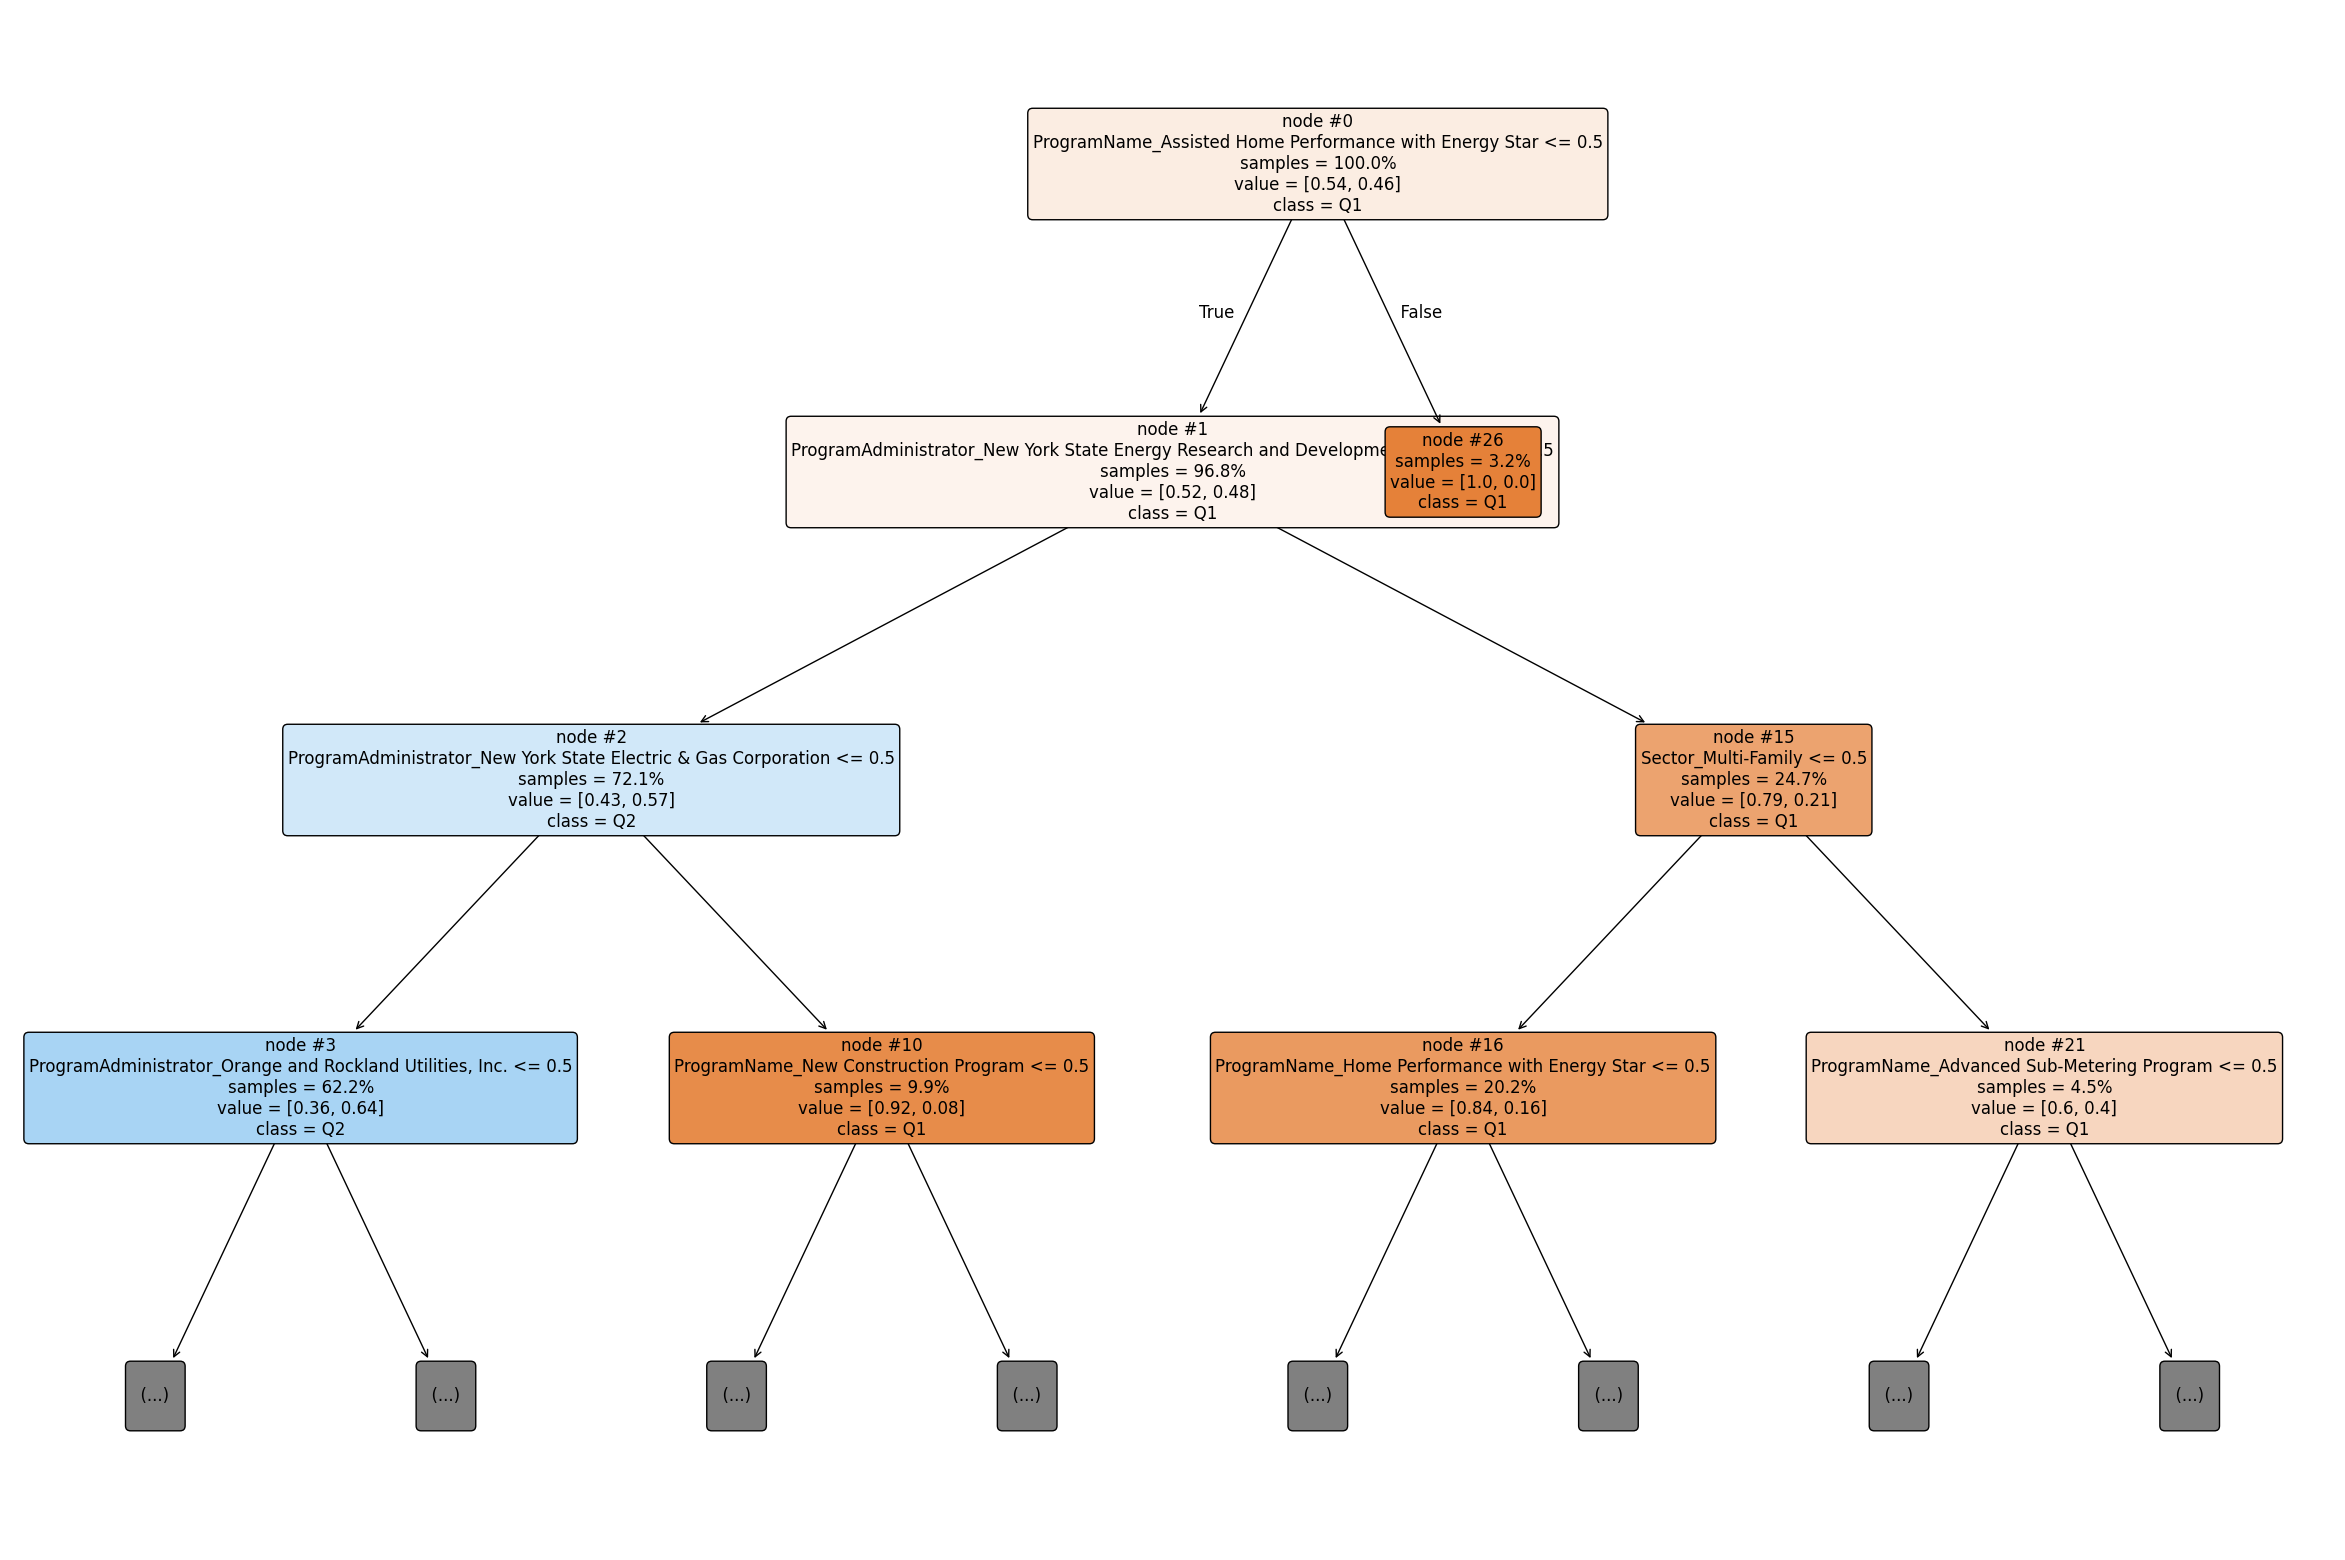

In [1557]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = clf.estimators_[0] # Uses first tree

plt.figure(figsize=(30, 20))  # Increase figsize for better readability/resolution

plot_tree(tree, 
          feature_names=columns_for_model, 
          class_names=["Q1", "Q2", "Q3", "Q4"], 
          filled=True, 
          rounded=True,
          max_depth=3,
          fontsize=12,
          precision=2,
          node_ids=True,
          proportion=True,
          impurity=False) 

plt.show()
